# It's Day 3.0! 

Keep in mind that transforming data takes up to 90% of the time for a typical data scientist...as we'll see today the modelling is a simple `.fit()` and wait. That's why we spent so long preparing out data, it will **ALL COME TOGETHER TODAY** Make sure you have all your transformations in order from Chapter 2 before moving on!!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



For this chapter we will model with the diamonds dataset.  [Additional info here](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
df_in = sns.load_dataset('diamonds')

In [ ]:
df_in.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


First we check for null values, here's the shorthand version!

In [ ]:
df_in.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

This is a useful function to see how many unique values are in each column!

In [ ]:
df_in.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In particular the `'cut'`, `'color'` and `'clarity'` columns are definitely useful, but they are categories with 5 and 7 categories each, so we would have to make 12 different columns to encode all of them? eg. `df_in['is_Premium'], df_in['is_Ideal']`?

In [ ]:
df_in['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df_in['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

`.value_counts()` is a very useful functino for your projects. So is `.groupby()`

In [ ]:
df_in.groupby(by = 'cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [ ]:
df_in.groupby(by = ['cut', 'color']).mean()

carat      depth      table  ...         x         y         z
cut       color                                  ...                              
Fair      D      0.920123  64.048466  58.969325  ...  6.018344  5.963190  3.839877
          E      0.856607  63.319643  59.364732  ...  5.909063  5.858214  3.722143
          F      0.904712  63.508013  59.453205  ...  5.990513  5.931122  3.787821
          G      1.023822  64.339809  58.773248  ...  6.173822  6.114076  3.963153
          H      1.219175  64.585149  58.696370  ...  6.579373  6.497393  4.219373
          I      1.198057  64.220571  59.237143  ...  6.564457  6.493486  4.193486
          J      1.341176  64.357143  58.917647  ...  6.747311  6.675882  4.319664
Good      D      0.744517  62.365710  58.541541  ...  5.620076  5.633897  3.504864
          E      0.745134  62.203751  58.779957  ...  5.617889  5.632454  3.496066
          F      0.775930  62.202310  58.910891  ...  5.693443  5.709659  3.544609
          G      0.850896  62.526636  58.471986  ...  5.850264  5.862824  3.647922
          H      0.914729  62.499573  58.611111  ...  5.968789  5.974245  3.726937
          I      1.057222  62.475096  58.773946  ...  6.253544  6.260536  3.901513
          J      1.099544  62.395765  58.813029  ...  6.377003  6.386026  3.977459
Ideal     D      0.565766  61.678370  55.965632  ...  5.186704  5.196224  3.201800
          E      0.578401  61.686677  55.967461  ...  5.215762  5.232214  3.220346
          F      0.655829  61.675562  55.924203  ...  5.408751  5.422250  3.338732
          G      0.700715  61.700164  55.902375  ...  5.511214  5.524007  3.403120
          H      0.799525  61.733194  55.965843  ...  5.731377  5.740446  3.539917
          I      0.913029  61.793598  56.021357  ...  5.976197  5.989479  3.695270
          J      1.063594  61.821987  56.012612  ...  6.320045  6.332098  3.912757
Premium   D      0.721547  61.169245  58.718964  ...  5.599869  5.571472  3.415926
          E      0.717745  61.175909  58.779461  ...  5.587116  5.558353  3.408875
          F      0.827036  61.259974  58.679279  ...  5.876692  5.844655  3.588391
          G      0.841488  61.279480  58.702360  ...  5.864254  5.833345  3.579641
          H      1.016449  61.322034  58.792034  ...  6.244508  6.228110  3.811699
          I      1.144937  61.328641  58.771849  ...  6.489531  6.453270  3.963894
          J      1.293094  61.390099  58.874752  ...  6.809975  6.770644  4.168020
Very Good D      0.696424  61.750165  58.041309  ...  5.501210  5.531613  3.405089
          E      0.676317  61.730250  58.038875  ...  5.432467  5.463213  3.373996
          F      0.740961  61.721627  57.848429  ...  5.610504  5.642717  3.472902
          G      0.766799  61.841279  57.784428  ...  5.660204  5.688752  3.509883
          H      0.915948  61.968366  57.903015  ...  5.982286  6.006272  3.713849
          I      1.046952  61.934551  58.105150  ...  6.272259  6.299028  3.890972
          J      1.133215  61.902065  58.277729  ...  6.460782  6.495074  4.006873

[35 rows x 7 columns]

We notice that the color of a diamond is actually graded on a scale, more info [here](https://www.lumeradiamonds.com/diamond-education/diamond-color). So unlike the usa, japan, europe situation, it makes sense for us to have a numerical ranking where 1 is D, 2 is E, 3 is F...etc. We do this using the map function on the `df_in['color']` column

In [ ]:
df_in['color'].map( {'D':1 , 'E':2, 'F':3, 'G':4,'H':5,'I':6 ,'J':7})

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

Inside the `.map()` function is a dictionary, a ***new data type*** indicated by braces `{ }`. Inside we have these pairs of *keys* and *values* the *key* being the original value (a string), the value being the mapping (an integer). Once we're happy with the result we can make it a new column.

In [ ]:
df_in['color_mapped'] = df_in['color'].map( {'D':1 , 'E':2, 'F':3, 'G':4,'H':5,'I':6 ,'J':7})

In [ ]:
### Mandatory exercise, import the diamonds dataset and map the 'cut' column to numbers 1 to 5, Note that ideal is better than premium and fair is the worst
## make a new column of 'cut_mapped'

The advantage of this mapping is that it's easier to make but the 1 + 2 = 3 problem still exists and we are still unable to say that a D is twice as good as E and 3 times as good as F? We should go back to the True or False which we learned yesterday. 

In [ ]:
df_in['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df_in['is_Ideal'] = (df_in['cut'] == 'Ideal') 
df_in['is_Premium'] = (df_in['cut'] == 'Premium') 
df_in['is_Very Good'] = (df_in['cut'] == 'Very Good') 
df_in['is_Good'] = (df_in['cut'] == 'Good') 
df_in['is_Fair'] = (df_in['cut'] == 'Fair') 

In [ ]:
df_in

,carat,cut,color,clarity,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,1,True,False,False,False,False
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,False,False,False,True,False
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,1,False,False,True,False,False
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,5,False,True,False,False,False


Looks good! Now let's drop any columns we no longer need. We can drop multiple columns by passing in a **LIST** of column names into the `columns = ` input of the `.drop()` function. 

In [ ]:
df_in.drop(columns = ['cut','color','clarity']) ## DROP COLUMN MADE FROM EXERCISE

,carat,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,True,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,False,False,False,True,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,5,False,True,False,False,False


In [ ]:
df_inputfinal = df_in.drop(columns = ['cut','color','clarity'])

# 3.1 Our first model, our first errors
Lets start with a plot!

In [ ]:
df_inputfinal.head()

,carat,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False


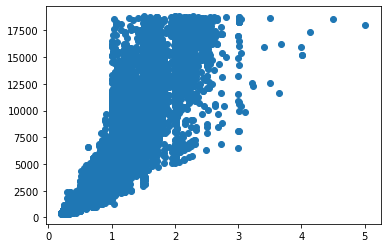

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_inputfinal['carat'], df_inputfinal['price'])
fig.show()

We can clearly see a relationship between *carat* and *price*. And we'll hope that the other features (columns) will help us distinguish between all the diamonds of the same "carat count", some are `$1000`, others are `$15000`. 

Right now, I'm going to use a geologists expertise, one of my parents is a Geologist (not my dad - but my mom). To build our very first model, 1 carat is worth about $1000. So the price can be estimated as the # of carats multiplied by 1000

In [ ]:
df_inputfinal['carat']*1000

0        230.0
1        210.0
2        230.0
3        290.0
4        310.0
         ...  
53935    720.0
53936    720.0
53937    700.0
53938    860.0
53939    750.0
Name: carat, Length: 53940, dtype: float64

In [ ]:
first_pred = df_inputfinal['carat']*1000

We just made our first predictions! But how do we know how good the predictions are? We can make another plot, but it would look just like the one above (but the x axis would be `1000,2000,3000...`)

We can use math, why don't we subtract our predicted values from the actual values. We'll also keep `df_inputfinal['price']` as our "true" price.

In [ ]:
true_price =  df_inputfinal['price']

In [ ]:
first_errors = true_price - first_pred

In the background `true_price`, `first_pred` are both columns (aka series) with row names for each diamond. So we are subtracting the true price and predicted price for **each diamond**. We will get a series `first_errors` which is how far away our predictions were for each diamond. Let's inspect: 

In [ ]:
first_errors

0          96.0
1         116.0
2          97.0
3          44.0
4          25.0
          ...  
53935    2037.0
53936    2037.0
53937    2057.0
53938    1897.0
53939    2007.0
Length: 53940, dtype: float64

An entire series is not very useful, we can take the sum of all the errors or the mean. Note that these are similar functions we saw in the last chapter applied to dataframes. Back then it gave us the mean or sum of every column.  When applied to a series (a single column) -  it will return a single value. 

In [ ]:
first_errors.sum()

169094347.0

In [ ]:
first_errors.mean()

3134.8599740452355

Our the predictions any good? We don't know! (probably not). Because errors usually based on the *magnitude* of the numbers (how big the numbers you're trying to predict, predicted prices of apples `$1/$2` off would be bad, but predicted prices of diamonds that are `$1/$2` off would be very good. 

This is why we should always start with a ***baseline***, future models we make should have lower errors than this. Let's call this first prediction a baseline. I've now consulted my dad, who is also a geologist, who says we can the depth of our diamond is worth about `$50` per depth in addition to `$1000` per carat, our second predictions now look like:

In [ ]:
second_pred = df_inputfinal['carat']*1000 + df_inputfinal['depth']*50.7674

In [ ]:
second_errors = df_inputfinal['price'] - second_pred

In [ ]:
second_errors.mean()

0.003236012962857267

In [ ]:
## What happened?

Gasp! Are you suspicious? **You should (always) be.** Data science is about being suspicious, engineering is about how much you trust the tools you have. When in doubt, plot:

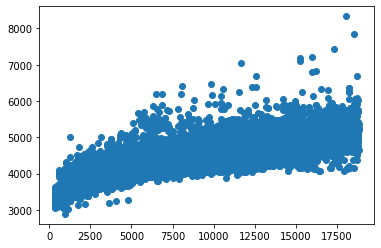

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_price, second_pred)
fig.show()

Here we plotted our predictions, the actual value `true_price` on the X axis and the predicted value `second_pred` on the Y. If the predicted values were near perfect, we would expect to see a perfectly diagonal line from (0,0) to (17500, 17500). We are nowhere close to that...

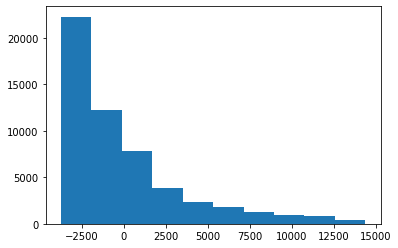

In [ ]:
fig, ax = plt.subplots()
ax.hist(second_errors)
fig.show()

This second plot reveals to us that our errors are still quite high, it just so happens that the **average** is around zero. The solution is to take the absolute value `.abs()` function of our errors, if you haven't heard about absolute values before, [read this](https://www.mathsisfun.com/numbers/absolute-value.html). 

In [ ]:
second_errors.abs().mean()

2668.7929961551176

The error we just found is called the **mean absolute error**, there also exists a common **mean_squared_error**. In  `mean_squared_error` rather than taking the absolute value of the difference, we square the difference (the squared of any number is positive). Mean squared error is essentially: 


```
second_errors_squared = second_errors*second_errors
second_errors_squared.mean()
```

Of course, there are function for calculating errors, We introduce the fourth and final library we will use called sklearn. It's the machine learning one, and of course very good at calulating errors. We don't need all of it right now, just the following parts. 
```
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
```

The `mean_absolute_error()` and `mean_squared_error()` functions both take the same 2 inputs, the **real y values** and the **predicted values** you've made. 

In [ ]:
mean_absolute_error(y_true = true_price, y_pred = second_pred)

2668.7929961553577

In [ ]:
mean_squared_error(y_true = true_price, y_pred = second_pred)

12667965.057203408

In [ ]:
## EASY CHALLENGE: find the two kinds of errors from our first set of predicition (first_pred) 
## using the functions we imported!
## first_pred = df_inputfinal['carat']*1000
## Were we better off? 

# 3.2 Into Linear Model

As we can see our models are clearly not good enough, but we on the right track in making predictions. All we need is some more information out of our other columns (aka features)

Our predictions so far are actually considered a linear model.


```
df['carat']*1000 + df['depth']*50.7674
```



Which was actually based on *Human knowledge* (my parents) if you consider the definition of AI: 
>the theory and development of computer systems able to perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and translation between languages.

One of those tasks is predicting the price of diamonds!! And we need our AI to be as good or better at making those predictions. But how will the AI have any idea on diamond prices.... the answer is in the DATA OF COURSE!

There is tons of information about diamonds in our data, such as the `table`, `x y z length`, `fair`, `premium` etc.  

In [ ]:
df_inputfinal.head()

,carat,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False


What if we can multiply each of those columns by some number (factor) too and add it to our predictions. Our new predictions could be



```
42 + df['carat']*1000 + df['depth']*50.7674 + df['table']*-12.54 + ...
+ df['x']*13 * df['y']*-12 + *df['z']*-8.9 + df['is_Fair']*-500 ... 
+ df['is_Premium'] * 789 + ...
```



What does this mean:  

1.   every diamond has a starting price of `$42`
2.   Then they are worth an extra `$1000 per carat`
3. They are worth`-12.54 per table value` and `$13 per x value` (obviously not as much of an impact) 
4.since the `'x0_Fair'` columns are all zero unless the diamond is fair then it is a `$-500` dollar deduction if the diamond is fair
5. Similarly if the diamond is premium that is a `$789` boost to its price. 

Its important to note that these factors, the `1000` and `42` and ... apply to **ALL THE DIAMONDS**. They do not change from one diamond to another, and our goal is to find these valus (called *coefficients*) such that they **minimize the overall errors from *the predictions for all diamonds***. 

Get familiar with the term ***coefficient***, we'll be using it a lot

![Courtesy of mathisfun.com/algebra](https://www.mathsisfun.com/algebra/images/variable-constant.svg)

> **RT: A linear model is each column being multiplied by a coefficient and added together to make a prediction**

For some diamonds the predicted price will be a little higher and others a little lower, the goal will be to reduce the `mean_squared_error()` for the entire dataset. To do so will involve complex gradient descent and matrix inversion to the power of...


#### Just kidding, there's a function for that

Remember that almost everything we've been importing so far has been objects. See:

```
fig = plt.subplots()
ax = plt.axes()
df = pd.DataFrame()
```
(the third line will just give you a blank dataframe) we are following the pattern:

`new_variable = importedlibrary.objectWeWant()`.

In [ ]:
first_linear_model = linear_model.LinearRegression()

When it comes to machine learning, sklearn doesn't care about the column names or the column headers. Rather than taking the dataframe, it actually requires an ***ARRAY*** (basically dataframes without the column headers and row numbers). 
>Luckily we can get an array from a dataframe using the `.value` attribute. 

In [ ]:
df_inputfinal.values

array([[0.23, 61.5, 55.0, ..., False, False, False],
       [0.21, 59.8, 61.0, ..., False, False, False],
       [0.23, 56.9, 65.0, ..., False, True, False],
       ...,
       [0.7, 62.8, 60.0, ..., True, False, False],
       [0.86, 61.0, 58.0, ..., False, False, False],
       [0.75, 62.2, 55.0, ..., False, False, False]], dtype=object)

The linear model uses a `.fit()` function. But remember we are trying to find the **coefficients** that will get us closest to the **real values** so we need to specify both the inputs `X=` and the values we are trying to precit `y=`.

In [ ]:
first_linear_model.fit(X = df_inputfinal.values, y = true_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


* `X` is expecting *2 dimensional data* here. If you only have one feature, you'll need do `df[['feature name']].values`
*   `y` is expecting a *Series of values*, usually its one target value to be predicted. Which is the true price of the diamonds!!


The `LinearRegression()` is a **model/predictor** we use the `.predict()` function. 
>(after the `.fit()` function, if you try to predict without `.fit()` first, it won't work, it won't know what to predict!!)

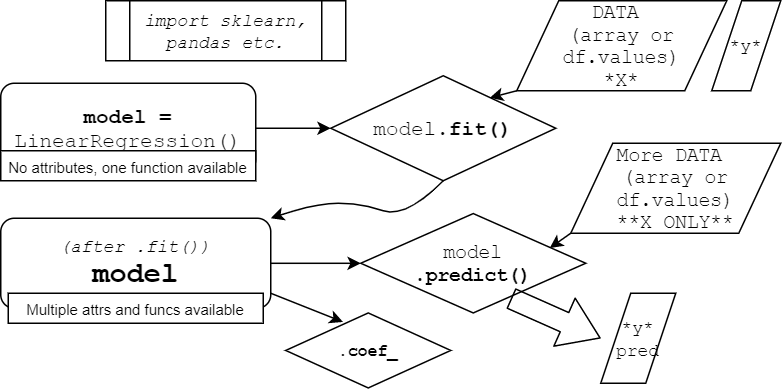

In [ ]:
first_linear_model.predict(X = df_inputfinal.values)

array([ 326.,  326.,  327., ..., 2757., 2757., 2757.])

This array is the predicted price of all the diamonds. Look at that! It took less then one second, and did everything we described in: 
```
42 + df['carat']*1000 + df['depth']*50.7674 + df['table']*-12.54 + ...
```

by finding just the right ***coefficients*** (to multiply each column by) which will give us close to the actual price of our diamonds. Let's save our predictions (we don't know what the coefficients are just yet, but we can find out!!).

In [ ]:
model_predictions = first_linear_model.predict(X = df_inputfinal.values)

We can look at the errors using `mean_squared_error()`

In [ ]:
mean_squared_error(y_true = true_price, y_pred = model_predictions)

1.649008701666133e-23

GASP! Shall we be suspicious? 

Okay back to the suspicion. When in doubt, plot

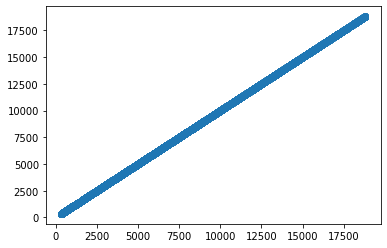

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_price, model_predictions)
plt.show()

I'm even more ***SKEPTICAL*** now. This is showing a near perfect prediction for EVERY DIAMOND. To investigate: Why don't we look at the coefficients. Remember we had about 1000*price but the model might go about the problem slightly differently. 
> We can access the linear coefficients using the `.coef_` attribute. Mind the '_' and of course the model has to be `'.fit()` to some data first for `.coef_` for work

In [ ]:
first_linear_model.coef_

array([ 9.65606670e-13,  6.42819131e-14,  7.91387626e-14,  1.00000000e+00,
       -2.07781925e-14,  3.87401699e-15, -1.73954818e-15,  5.26296129e-15,
       -5.68715539e-15,  1.65379168e-14, -5.70278760e-15, -4.84746834e-15,
       -3.00495102e-16])

Hmm it looks like all the coefficients are very small, except for 1 on the 4th column. What is the data in the fourth column?

In [ ]:
df_inputfinal.head()

,carat,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False


In [ ]:
## MANDATORY EXERCISE, FIX THE df_inputfinal MATRIX, its a silly mistake but a common one. 
## then make a prediction again ( model = linear_model.LinearRegression())
##model.fit..., model.predict...and check the error actual error of the model


# 3.3 The Most Common Mistake

So far I've been intentionally setting the examples to show silly mistakes which you can fix as long as you remain skeptical and use the right tools. This next mistake is something every data scientist and machine learning research will lose sleep over, it is perhaps the goal of proper machine learning. And I'll tell you what it is right away: ***overfitting***. 

Lets load in the cars dataset again, use your solution from Section 2.5 to get to df_carsfinal. 

In [ ]:
df_carsin = sns.load_dataset("mpg")
df_cars = df_carsin.dropna().copy()
df_cars['weight_to_hp_ratio'] = df_cars['horsepower'] / df_cars['weight']
df_cars['is_usa'] = (df_cars['origin'] == 'usa')
df_cars['is_europe'] = (df_cars['origin'] == 'europe')
df_cars['is_japan'] = (df_cars['origin'] == 'japan')
df_cars = df_cars.drop(columns = ['name','weight_to_hp_ratio','origin'])

We are trying to predict the `mpg` of a column and thus its efficiency, so we will drop it. 

In [ ]:
true_mpg = df_cars['mpg']
df_cars = df_cars.drop(columns = 'mpg')
df_cars.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
0,8,307.0,130.0,3504,12.0,70,True,False,False
1,8,350.0,165.0,3693,11.5,70,True,False,False
2,8,318.0,150.0,3436,11.0,70,True,False,False
3,8,304.0,150.0,3433,12.0,70,True,False,False
4,8,302.0,140.0,3449,10.5,70,True,False,False


Let us use a linear model again. We've already imported the library, however we are declaring a new instance, a fresh model that has not been fitted to any data yet. 

In [ ]:
cars_linear_model = linear_model.LinearRegression()

In [ ]:
cars_linear_model.fit(X = df_cars.values, y = true_mpg )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
first_mpg_predictions = cars_linear_model.predict(X = df_cars.values)

In [ ]:
mean_squared_error(true_mpg, first_mpg_predictions)

10.682121627762635

Not bad. We didn't take a complete baseline (once we get better at modelling, this linear model will be the baseline). Lets make a plot: 

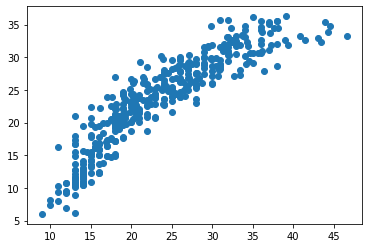

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_mpg, first_mpg_predictions)
fig.show()

Say we want to improve our model, and an obvious place would be to use the **names** of the cars, lets backtrack. 

In [ ]:
df_carsin.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


Let's use a new encoder this time and encode the car names. Then we do the same thing merging our data and dropping the columns we encoded. This step would be really tedious if not for this OneHotEncoder() that we won't be formally going over, but is explained in ***Section 2.5** and **Section 3.6***

In [ ]:
import sklearn.preprocessing as skpre 
df_in2 = df_carsin.dropna().copy()
encoder = skpre.OneHotEncoder()
encoder.fit(X = df_in2[['origin', 'name']].values)

array = encoder.transform(X = df_in2[['origin','name']].values).toarray() 
df_encoded= pd.DataFrame(data = array, index = df_in2.index, columns = encoder.get_feature_names())
df_carsmerged = pd.concat(objs = [df_in2, df_encoded], axis = 1)

df_carsnames= df_carsmerged.drop(columns = ['origin', 'name'])
df_carsnames

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,x0_europe,x0_japan,x0_usa,x1_amc ambassador brougham,x1_amc ambassador dpl,x1_amc ambassador sst,x1_amc concord,x1_amc concord d/l,x1_amc concord dl 6,x1_amc gremlin,x1_amc hornet,x1_amc hornet sportabout (sw),x1_amc matador,x1_amc matador (sw),x1_amc pacer,x1_amc pacer d/l,x1_amc rebel sst,x1_amc spirit dl,x1_audi 100 ls,x1_audi 100ls,x1_audi 4000,x1_audi 5000,x1_audi 5000s (diesel),x1_audi fox,x1_bmw 2002,x1_bmw 320i,x1_buick century,x1_buick century 350,x1_buick century limited,x1_buick century luxus (sw),x1_buick century special,x1_buick electra 225 custom,x1_buick estate wagon (sw),...,x1_toyota celica gt liftback,x1_toyota corolla,x1_toyota corolla 1200,x1_toyota corolla 1600 (sw),x1_toyota corolla liftback,x1_toyota corolla tercel,x1_toyota corona,x1_toyota corona hardtop,x1_toyota corona liftback,x1_toyota corona mark ii,x1_toyota cressida,x1_toyota mark ii,x1_toyota starlet,x1_toyota tercel,x1_toyouta corona mark ii (sw),x1_triumph tr7 coupe,x1_vokswagen rabbit,x1_volkswagen 1131 deluxe sedan,x1_volkswagen 411 (sw),x1_volkswagen dasher,x1_volkswagen jetta,x1_volkswagen model 111,x1_volkswagen rabbit,x1_volkswagen rabbit custom,x1_volkswagen rabbit custom diesel,x1_volkswagen rabbit l,x1_volkswagen scirocco,x1_volkswagen super beetle,x1_volkswagen type 3,x1_volvo 144ea,x1_volvo 145e (sw),x1_volvo 244dl,x1_volvo 245,x1_volvo 264gl,x1_volvo diesel,x1_vw dasher (diesel),x1_vw pickup,x1_vw rabbit,x1_vw rabbit c (diesel),x1_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Basically, we've made a new dataset where the ***NAMES OF THE CARS*** are made as new columns. We need to make a another model and fit it to our new inputs. The predicted values `true_mpg` does not need to be changed. 

In [ ]:
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = df_carsnames.values, y = true_mpg )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
second_mpg_predictions = cars_linear_model_2.predict(X = df_carsnames)

In [ ]:
mean_squared_error(true_mpg, second_mpg_predictions)

1.6438895312677044e-28

GASP again, what happened this time? Let's plot

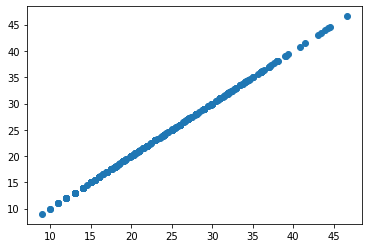

In [ ]:
fig, ax = plt.subplots()
ax.scatter(true_mpg, second_mpg_predictions)
fig.show()

Let's check the coefficients

In [ ]:
cars_linear_model_2.coef_

array([ 1.00000000e+00, -6.36452677e-16, -4.58268972e-17,  2.11406830e-17,
        1.41761610e-17,  3.69512690e-16, -1.71013958e-15, -1.93395695e-16,
        4.01263726e-15, -3.81924157e-15, -1.68804770e-15, -1.58169358e-14,
       -2.08489429e-15,  1.56914587e-15,  1.87442265e-15,  4.20835142e-16,
       -3.95736142e-15, -4.01983245e-15, -6.50959428e-15, -4.23636319e-15,
       -3.00330828e-15, -3.54292027e-15, -2.78289273e-15, -4.75802352e-16,
        6.76777977e-15, -3.24759012e-15, -5.79789481e-16,  4.89765275e-15,
        5.93793709e-15,  5.05404064e-16, -6.00082513e-16, -6.00652760e-15,
        5.92163654e-15,  2.45321263e-16, -2.35778316e-15,  1.14955169e-14,
       -7.05538546e-15,  1.87494336e-15, -7.55780255e-15, -3.99548870e-15,
       -8.60040604e-15,  5.82255755e-15,  9.57633058e-15, -7.17793207e-16,
        2.72224247e-15, -1.06751250e-14,  5.58949251e-15, -4.60680669e-15,
       -3.84437685e-17,  3.49538727e-15, -6.35865045e-15, -6.43027454e-15,
        8.28990136e-15, -

Wow there are so many, could it be that we are OVERFITTING?

Overfittting is a real problem, we have over 300 coefficients and we are trying to predict the mpg for about 300 cars. If ***each car has its own coefficient, then the fitted value would just be the `mpg` of the car itself***. Imagine a two car scenario. 

```
car, hp, name, mpg
CAR1, 86.0, 'ford mustang', 27.0
CAR2, 160, 'oldsmobile', 12.0
```
If we transform this into encoded features
```
car, hp, is_ford, is_oldsmobile, mpg
CAR1, 86.0, 1,0, 27.0
CAR2, 160, 0, 1, 12.0
```

Then a perfect linear model would be:
```
mpg = is_ford*27 + is_oldsmobile*12
```

Great, we know the fuel consumption of ford mustangs and oldsmobiles but the model hasn't learned anything about **cars in general**. What if a third toyota corolla comes along? There is no point in being really good at predicting the *mpg of cars we already know,* we must predict the mpg of new cars - specifially - cars the model has not seen before. 

>Basically, you can't fit to the data and then *make predictions on the **same** data.* Your model is only as good as its predictions on new data, data it was not fitted on. **This is how you deal with overfitting**

Since it would be rather difficult to go and acquire lots of new cars and their mpg values to *properly test the model* the next best thing would be to divde all the data we have (392 rows) into training and validation data.


We will use the first 300 rows to train the data - the same way as before to `.fit()` the model, and then **make predictions on the remaining 92 rows* comparing the accuracy of those predictions to the mpg of those vehicles (which we know) will tell us how accurate our model is. 

We could simply: 
```
X_train = df_carsfinal.head(300)
X_test = df_carsfinal.tail(392-300)
y_train = true_mpg[0:300]
y_test = true_mpg[300:]
```


But before you as, yes there is a function to split the data for us!
```import sklearn.model_selection as skmodelselect```

In [ ]:
from sklearn.model_selection import train_test_split

The function is called `train_test_split()`, 

*   NEEDS: the full input X array and full y values,
*   WILL: *randomly* (random is  good, in case the order of the data gives something away) pick a percentage of the data to be test. 

Generally, we choose 20% of the data to be used for testing, 80% for training. Of course this is a fine balance, we'll talk about it more later. 
We're not using the heavily encoded df_carnames anymore, lets go back to df_cars

In [ ]:
df_cars

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
0,8,307.0,130.0,3504,12.0,70,True,False,False
1,8,350.0,165.0,3693,11.5,70,True,False,False
2,8,318.0,150.0,3436,11.0,70,True,False,False
3,8,304.0,150.0,3433,12.0,70,True,False,False
4,8,302.0,140.0,3449,10.5,70,True,False,False
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,True,False,False
394,4,97.0,52.0,2130,24.6,82,False,True,False
395,4,135.0,84.0,2295,11.6,82,True,False,False
396,4,120.0,79.0,2625,18.6,82,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20)

Note that as you inspect these values, your `X_train` and your other variables will be different from mine since the selection is done **randomly**

In [ ]:
X_test ## only 79 rows, 20% of data

,cylinders,displacement,horsepower,weight,acceleration,model_year,is_usa,is_europe,is_japan
12,8,400.0,150.0,3761,9.5,70,True,False,False
274,5,131.0,103.0,2830,15.9,78,False,True,False
242,4,121.0,110.0,2600,12.8,77,False,True,False
364,8,350.0,105.0,3725,19.0,81,True,False,False
74,8,302.0,140.0,4294,16.0,72,True,False,False
...,...,...,...,...,...,...,...,...,...
145,4,83.0,61.0,2003,19.0,74,False,False,True
25,8,360.0,215.0,4615,14.0,70,True,False,False
276,4,121.0,115.0,2795,15.7,78,False,True,False
244,4,90.0,48.0,1985,21.5,78,False,True,False


In [ ]:
### MANDATORY CHALLENGE: INSPECT X_train, y_train, X_test, y_test ETC!!!
###THEN. use training (.fit()) of linear model on X_train and y_train. Make predictions using X_test


Let's make the same model again:

In [ ]:
cars_linear_model_2 = linear_model.LinearRegression()

But this time, **only fit it** to the data in `X_train` and `y_train`

In [ ]:
cars_linear_model_2.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, rather than making predictions on the same data it was 'fitted' on, we make predictions on `X_test`. The requirement, of course is that `X_test` has the same columns and the same transformations as `X_train`

In [ ]:
cars_linear_model_2.predict(X = X_test)

array([14.5316702 , 26.34727313, 26.91871886, 23.84415811, 11.3234727 ,
       31.81476486, 10.71601803, 25.79784235, 22.80347942, 16.32552211,
       28.08274367, 24.44932336, 14.8287237 , 20.14861362, 28.1767684 ,
       32.22744489, 20.92568457, 20.41598371, 21.0476185 , 21.83738006,
       27.98009451, 17.49890133, 20.17260801, 12.12062101, 29.85285955,
       24.52612423, 25.72100317, 12.41167477,  6.06051685, 30.84782242,
       33.19283344, 23.4962158 , 26.59269484, 12.93888334, 10.45032637,
       32.4457196 , 26.30068424, 23.35948826, 31.07304925, 34.61539544,
       20.58914123,  9.04286767, 35.33366043, 31.73636492, 29.50021624,
       16.4196973 , 22.67359972, 27.49222819, 32.50852304, 11.74572212,
       26.07252872, 23.97885235, 17.22772884, 25.72037965, 11.77018596,
       15.70870958, 31.62190883, 25.87472664, 23.85354254, 15.31378336,
       20.99200819, 19.91845478, 25.91832847, 10.262218  , 26.21182764,
       20.82521549, 11.25462733, 13.75921792, 28.52041428, 15.64

Now, we compare this array of values to the ground truth `y_test`:

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)

In [ ]:
mean_squared_error(y_test, y_predicted_test)

10.664613274842763

This errror value is reasonable. And thus far the best model we have made. 


But you probably had a different error, there lies the problem. Because the train_test_split is random, the errors will change too, say we were to run the same lines again: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train, y = y_train)
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

14.06500132768623

We are breaking the rule of never running the same cell twice here. In this case it is okay since all of the variables are contained, we are over-writing `X_train, X_test, y_train, y_test` each time. 

Here we are using the model to make 2 predictions (which is totally okay, you can make as many as you want). The key here is to note that the errors from the training data is lower than the errors from the testing data. This is to be expected, since it knows the training data better, but the real accuracy of the model must be judged on the **testing data**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_2.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

10.572083220905428

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

11.330418710387262

In [ ]:
df_carsnames

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,x0_europe,x0_japan,x0_usa,x1_amc ambassador brougham,x1_amc ambassador dpl,x1_amc ambassador sst,x1_amc concord,x1_amc concord d/l,x1_amc concord dl 6,x1_amc gremlin,x1_amc hornet,x1_amc hornet sportabout (sw),x1_amc matador,x1_amc matador (sw),x1_amc pacer,x1_amc pacer d/l,x1_amc rebel sst,x1_amc spirit dl,x1_audi 100 ls,x1_audi 100ls,x1_audi 4000,x1_audi 5000,x1_audi 5000s (diesel),x1_audi fox,x1_bmw 2002,x1_bmw 320i,x1_buick century,x1_buick century 350,x1_buick century limited,x1_buick century luxus (sw),x1_buick century special,x1_buick electra 225 custom,x1_buick estate wagon (sw),...,x1_toyota celica gt liftback,x1_toyota corolla,x1_toyota corolla 1200,x1_toyota corolla 1600 (sw),x1_toyota corolla liftback,x1_toyota corolla tercel,x1_toyota corona,x1_toyota corona hardtop,x1_toyota corona liftback,x1_toyota corona mark ii,x1_toyota cressida,x1_toyota mark ii,x1_toyota starlet,x1_toyota tercel,x1_toyouta corona mark ii (sw),x1_triumph tr7 coupe,x1_vokswagen rabbit,x1_volkswagen 1131 deluxe sedan,x1_volkswagen 411 (sw),x1_volkswagen dasher,x1_volkswagen jetta,x1_volkswagen model 111,x1_volkswagen rabbit,x1_volkswagen rabbit custom,x1_volkswagen rabbit custom diesel,x1_volkswagen rabbit l,x1_volkswagen scirocco,x1_volkswagen super beetle,x1_volkswagen type 3,x1_volvo 144ea,x1_volvo 145e (sw),x1_volvo 244dl,x1_volvo 245,x1_volvo 264gl,x1_volvo diesel,x1_vw dasher (diesel),x1_vw pickup,x1_vw rabbit,x1_vw rabbit c (diesel),x1_vw rabbit custom
0,18.0,8,307.0,130.0,3504,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
df_carsnames = df_carsnames.drop(columns = 'mpg')

If we had instead used `df_carsfinal_2` which is 300+ columns, we will see the effect of overfitting: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_carsnames, true_mpg, test_size = 0.20)
cars_linear_model_2 = linear_model.LinearRegression()
cars_linear_model_2.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_2.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

0.7626237793120978

In [ ]:
y_predicted_test = cars_linear_model_2.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

3.7281306660409704e+16

This is how you detect overfitting, whe the error from the training data is low, but the error from the testing data is extraordinary, billions of times higher. This would render the model built from `df_carsfinal_2` is basically useless. 

In [ ]:
## MANDATORY EXERCISE, split the DIAMONDS (df_inputfinal) dataset into training and testing data. 
## Find the error of a linear model on the testing data of 20% of the entire dataset. 

In [ ]:
df_inputfinal

,carat,depth,table,price,x,y,z,color_mapped,is_Ideal,is_Premium,is_Very Good,is_Good,is_Fair
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,2,False,True,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,False,False,False,True,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,6,False,True,False,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,7,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,True,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,False,False,False,True,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,False,False,True,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,5,False,True,False,False,False


#3.4 To FIX our model!

Overfitting is a huge problem and costs data science lots of sleep and business lots of money when the model isn't preforming as expected or advertised. Its very subtle because striving for a better model gets better results to a certain point, and then overfitting comes in and things go downhill. 

> The goal is to find the best model possible and *adjust it* (adjustments tell the model to behave and train itself a certain way), while focusing on the testing results.

Lets bring in a different kind of linear model, it will help us

In [ ]:
lasso_linear_model = linear_model.Lasso()

We also add the `random_state` variable, which is any integer value which determines the background randomness algorithm and gives us the **same  train test split** each time. Although your errors might differ from me earlier, once we set random_state to 0 (could have been any integer), we should get the same errors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_carsnames, true_mpg, test_size = 0.20, random_state = 0)

lasso_linear_model.fit(X = X_train, y = y_train)

y_predicted_train = lasso_linear_model.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

11.72441335326703

In [ ]:
y_predicted_test = lasso_linear_model.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

11.919422233359253

In the model above we are still using `df_carsnames` which is very prone to overfitting. But unlike last time, the errors on the test set is no longer in the billions. All we changed was the model, rather than using `linear_model.LinearRegression()` we used `linear_model.Lasso()`

> **Changes in the model changes our predictions, our goal is to find the right model for the job.**

In [ ]:
lasso_linear_model.coef_

array([-0.        ,  0.        , -0.00824087, -0.00651267,  0.        ,
        0.64968408,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.  

But what is Lasso? It is still a linear model that finds coefficients etc..
However as we analyze the coefficients we can see that the majority are zeros. This is reflected in its goal. 

Its still trying to minimize the total squared error, however it tries to do so with the fewest non-zero coefficients possible. It's *objective* is:


```
minimize squared error + alpha*(absolute value of all coefficients, summed) 
```

So having many zeroes will benefit the model, and the model wants zeroes which benefits us. Since the majority of the columns will no longer be used, we avoid the problem of overfitting by only using the important columns that applies to all the data. 

In [ ]:
## EXERCISE, use the LASSO model df_inputfinal and investigate to see if you get the same coefficients
## as above

Lets now try it on the original df_cars dataset, remember that this dataset had less features, will we still see a lot of zeros?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso()
cars_linear_model_3.fit(X = X_train, y = y_train)

y_predicted_train = cars_linear_model_3.predict(X = X_train)
mean_squared_error(y_train, y_predicted_train)

12.901084617225893

In [ ]:
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

7.33084361927002

It turns out our model is performing around the same as basic `.LinearRegression()` but looking at the objective equation for`Lasso()` again: 

```
minimize squared error + alpha*(absolute value of all coefficients, summed) 
```


The alpha value is key. If `alpha = 0` then the objective would be the same as `.LinearRegression()` . We can see there is a default value for `alpha = 1.0` , when we initiate `linear_model.Lasso()`, lets change that to be really small 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso(alpha = 0.001)
cars_linear_model_3.fit(X = X_train, y = y_train)
## straight to predictions
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

7.286100787404706

The point is, `.Lasso()` gives us an option to customize it, by altering the `alpha = ` parameter, there is some alpha which gives us the most accurate prediction without overfitting (**lowest testing error**). Just because the error decreased when we went from 1 -> 0.001 it does not mean our best model is at 0.001, its likely to be at some middle ground in between. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cars, true_mpg, test_size = 0.20, random_state = 416)
cars_linear_model_3 = linear_model.Lasso(alpha = 0.015)
cars_linear_model_3.fit(X = X_train, y = y_train)
## straight to predictions
y_predicted_test = cars_linear_model_3.predict(X = X_test)
mean_squared_error(y_test, y_predicted_test)

7.225572456065225

See, told ya!

In [ ]:
## MANDATORY Exercise: There is another linear_model that can be adjusted with an alpha value. 
## try .linear_model.Ridge() and find the best alpha for the cars dataset 
## make sure you use .train_test_split() (keep random_state = 0)

These exercises are really important, we've covered a lot about modelling and its crucial that you apply it and use it before the next step. 

# HOMEWORK Exercise

In [ ]:
df_housing = pd.read_csv('/content/sample_data/california_housing_train.csv')

I've found you a new dataset, don't worry about where I got it from. Have a look, the column names are rather explanatory. Each row/observation in this dataset is a district in California and various properties of houses there. 

In [ ]:
df_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


Tasks:
1. Make some simple plots based on your intuition of which columns/features would have a correlation with median_house_value
2. Use ridge regressions alpha = 1.0 and a train test split to predict the median_house_value of a the data using .train_test_split(), test on 15% of the data. 
3. Repeat step three using the new value you found, compare and contrast results
4. (After tomorrow, or reading ahead) Use validation curves to find the optimal value of alpha, choose a suitable number of folds yourself

#BONUS Content Sklearn preprocessing

We introduced the fourth and final library we will use, called sklearn.The tool we want is called `OneHotEncoder()`. We will use this to change our features of strings into numerical numbers for our models in Chp 3. This is a shorter, one line way of produduing `'is_USA'`, `'is_Japan'`, `'is_Europe'` encoded columns. 
> For categories where there are many options (such as `'color'` and `'clarity'` in the diamonds dataset, this is the perferred way)  


In [ ]:
encoder = skpre.OneHotEncoder()

Sklearn is the machine learning library, and it doesn't care about column labels or row numbers anymore, all it wants are the numbers in an `array`. Luckily we can get the `array` of our dataframes using the `.values` attribute. 

In [ ]:
df_in.values ## this gives us an array

For objects from `scikit learn` the function we most care about is to `.fit()`. Currently, the encoder knows nothing because haven't 'fitted' it to anything yet. When we fit, the encoder will be introduced to the data we have, and it will adjust itself to be useful for that data. 

Let's encode the columns `'cut'` and `'clarity'`. To get 2 columns back from a dataframe, index with a `list` of column names. You don't need the spaces here, I'm just showing that its a list. 

In [ ]:
df_in[ ['cut','clarity'] ]

Remember we need to use `.values` to get that array!!

In [ ]:
encoder.fit(X = df_in[['cut','clarity']].values)

Now that it has ***fitted itself*** to the data, we can use some of the features to get the feature names we want and also use it for transformations

In [ ]:
encoder.get_feature_names()

In [ ]:
encoder.transform(X = df_in[['cut','clarity']]).toarray()

Technically we are stacking functions here, but the `.toarray()` function is pretty standard since usually encoder gives us a matrix (don't worry about matrix, we convert it to an array)

![alt text](https://i.imgur.com/z8i5Ky0.png)

We can see that the encoder is as good as useless until we fit it into some data, this example we used: `encoder.fit(X = df_in[['cut','clarity']].values))` after the `.fit()` we can give it more data to transform it. We gave it `.transform(X = df_in[['cut','clarity']]).toarray()`


It was perfectly fine to transform the same data it was fitted on, but we are not limited, we can transform even more or even less data. The transformed array has 13 columns, one for each category specified in .get_feature_names() for each of: `['x0_Fair', 'x0_Good', 'x0_Ideal', 'x0_Premium', 'x0_Very Good',
       'x1_I1', 'x1_IF', 'x1_SI1', 'x1_SI2', 'x1_VS1', 'x1_VS2',
       'x1_VVS1', 'x1_VVS2']`


The feature names actually ***MATCH*** the columns of the array! They are both useful and we will save it with the goal of getting it back into a ***DATAFRAME***

In [ ]:
colum_names = encoder.get_feature_names()
array = encoder.transform(X = df_in[['cut','clarity']]).toarray()

And the row names should be the same as the row names of `df_in`, also called `index`. It's basically whole numbers from 0 to 53940 (length of dataset). 

In [ ]:
df_in.index

In [ ]:
row_names = df_in.index

Now we need to take these three peices of information and put them together in a dataframe!! We use the `pd.DataFrame()` function which is expecting 3 inputs (array = , index = , and columns = )

In [ ]:
pd.DataFrame(data = array, index = row_names, columns = colum_names)

There we have it, we just encoded 2 columns for 53940 rows, the first diamond was an IDEA and SI2, the second was Premium and SI1 etc!!

An alternative way to do this would be to ditch the variable names and directly add the array, columns and index to `pd.DataFrame()` like so: 


```
df_encoded = pd.DataFrame(data = encoder.transform(X = df_in[['cut','color']]).toarray(),
             index = df_in.index,
             columns = encoder.get_feature_names())
```



In [ ]:
df_encoded = pd.DataFrame(data = array, index = row_names, columns = colum_names)

In [ ]:
## Mandatory exercise, encode the original 'color' column. Use a new encoder 
## encoder2 = skpre.OneHotEncoder()
## even though its one column, we still have to use
## df_in[ ['color',] ] as a list of 1, just trust me here...

Now we need to take the encoded dataframe and MERGE IT with our old df_in! Luckily there's a function here: 

In [ ]:
pd.concat([df_in, df_encoded], axis = 1)

Just like how we have lists of numbers `[1,2,3]` we can have lists of dataframes to `[df1,df2,df3]`. We can actually have lists of anything, but the function `pd.concat(objs = )` was specifically looking for a list of dataframes, which is what we provided. `axis = 1` tells the function to add everything as new columns, without affecting the rows. `axis = 0 ` would have added thousands of rows below (try it!)

In [ ]:
df_merged = pd.concat([df_in, df_encoded], axis = 1)

We drop `'cut'` and `'color'` since we encoded them, and `clarity` since we are ignoring it. 

In [ ]:
df_input_encoded_final = df_merged.drop(columns = ['cut','color','clarity'])

# Tomorrows Content - all about validation

Now we have to address the 2 pesky problems I've let you get away with so far. 

1.   Re-running the cell, there must be a better way of testing the models and seeing all the results
2.   The random state variable, if the model is best in one random state (of train test split) it might be worse on another



The second problem is key especially in a small datast since a few tough values will really ramp up the error. So a model might just be lucky that the hardest to predict values were not in the test set, lucky rather than good. Imagine if the mpg was: 
`10,11,13,15,35,9,9,11...` then wherever that 35 is - will ruin everything. 

What we need is cross validation, best shown in a picture: 
![Cross Validation](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1024px-K-fold_cross_validation_EN.svg.png)

Essentially all of our data gets to be in the **testing set** exactly **once**. Each iteration takes a different slice or ***fold*** of the data to **test with**, we keep track of the error and use the median of all the tests as our result. 

Of course there is a way for us to slice the data and keep track of the folds, I'm not going to bother (I've heard that when it comes to high level data science...if you're writing a loop...you're probably doing it wrong)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lasso_linear_model = linear_model.Lasso(alpha = 0.015)

In [ ]:
scores = cross_val_score(estimator = lasso_linear_model, 
                         X = df_carsfinal, 
                         y = true_mpg, cv = 5)

Rather than specifying the size of the test set, we specity the number of folds we want to use. (5 folds means 20% +- nearest integer) will be tested at once. `cross_val_score()` will:

1. Take the model passed in as the `estimator = ` and fit it to all but 1 fold of the data
2. Test the model on the 1 fold and save the result
3. Repeat for each of the folds, as specified by the cv. 
4. Return an array of the test score from each fold

In [ ]:
scores

What it has returned is the default scoring called R^2 score (aka Coefficient of determination) for now just know that the perfect fit is 1, complete trash is 0. This average score  of the five scores is a better representation of the overall error. 

In [ ]:
scores.mean()

We can ask `cross_val_score()` to calculate the errors we are more familiar with instead using the `scoring = ` input. Go for: 

`'neg_mean_square_error'` or `'neg_mean_absolute_error'`

In [ ]:
scores_2 = cross_val_score(estimator = lasso_linear_model, 
                         X = df_carsfinal, 
                         y = true_mpg, cv = 5, scoring = 'neg_mean_squared_error')

A negative value is returned because in scoring higher score is better, so we take the negative of the error at the end, a smaller negative value is better. This is still the `mean_squared_error` we saw earlier.  

In [ ]:
scores_2.mean()

The advantage of using `cross_val_score()` is that it gives us a more accurate measure of the error and does not "waste" any data by leaving it in the testing set. The disadvantage is of course computational, since we train and fit 5 times, if we were using a large dataset (such as the diamonds) this would take more time. 

In [ ]:
lasso_linear_model = linear_model.Lasso(alpha = 0.015)
scores_2 = cross_val_score(estimator = lasso_linear_model, 
                         X = df_carsfinal, 
                         y = true_mpg, cv = 5, scoring = 'neg_mean_squared_error')
scores_2.mean()

It is also repeatable, there is no random state or shuffling. So now, we can compare different values of alpha to find us the best model with the lowest error after cross validation. 

In [ ]:
lasso_linear_model = linear_model.Lasso(alpha = 0.001)
scores_2 = cross_val_score(estimator = lasso_linear_model, 
                         X = df_carsfinal, 
                         y = true_mpg, cv = 5, scoring = 'neg_mean_squared_error')
scores_2.mean()

Indeed a `.Lasso(alpha = 0.015)` is better than `alpha = 0.001` now do we just test a bunch of values and hope we find the best `alpha`? 

## luckily, there's a function for that

In [ ]:
from sklearn.model_selection import validation_curve

A validation curve will help us..requirements:


*  INPUTS: the model, X values, y values, the paramter we are investigating (`alpha`) and a list of `alpha` values we want to test eg `[0.001,0.01,0.1,0.2,0.5,1,2]`. And number of folds for the cross validation. 
*   OUPUTS: Two arrays, one for the training scores, the other for the testing


In [ ]:
alpha_range = [0.001,0.005,0.01,0.02,0.4,0.5]
train_scores, valid_scores = validation_curve(estimator = linear_model.Lasso(),
                                              X = df_carsfinal, 
                                              y = true_mpg, 
                                              param_name = 'alpha',
                                              param_range = alpha_range, 
                                              cv = 5)

In [ ]:
train_scores

We asked the function to test 6 different `alpha` values, and train over 5 folds each time, all the scores are shown above (still R^2 score, 1.0 is best). We only want to look at the mean of each alpha test (row wise, axis = 1 for numpy arrays)

In [ ]:
avg_train_scores = np.mean(train_scores, axis = 1)
avg_valid_scores = np.mean(valid_scores, axis = 1)

In [ ]:
avg_train_scores

what do we do? Plot!

In [ ]:
fig, ax = plt.subplots()
ax.semilogx(alpha_range, avg_train_scores, marker = '.')
ax.semilogx(alpha_range, avg_valid_scores, marker = '.')
ax.set(title = 'Validation Curve for Lasso Model')
fig.show()

These curves are very useful to show how the model behaves as one parameter changes. Luckily in a linear model there is usually one major parameter to change, tomorrow when we skip ahead to Neural Networks there will be multiple parameters to adjust, however the concept of **train test split, overfitting, validation, cross validation** will still apply

Make sure you review today's content, there was a lot and make sure you complete all the exercises. It doesn't hurt to spend a lot of time on this chapter, tinkering with the models, as the next chapter will be the last day of content before the project. 

In [ ]:
## MANDATORY EXERCISE: use the lasso OR ridge model to beat the linear model you used
## on the DIAMONDS dataset 
## Then create a validation curve to find the optimal alpha value 